In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVR, SVR
import matplotlib.pyplot as plt
import random as r
from sklearn.datasets import load_diabetes

In [66]:
data = load_diabetes()
X, y = data.data, data.target

In [65]:
X = np.asarray(X)
y = np.asarray(y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [78]:
def fitnessfunction(kernel, nu):
    try:
        model = NuSVR(kernel=kernel, nu=nu)
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test) * 100
        return accuracy
    except Exception as e:
        print(f"Error with parameters: kernel={kernel}, nu={nu}. Error: {e}")
        return 0

In [79]:
kernellist = ['rbf', 'poly', 'linear', 'sigmoid']
best_accuracy = 0
best_kernel, best_nu, best_epsilon = None, None, None
accuracies = []
iterations = 100

In [81]:
for i in range(iterations):
    k = r.choice(kernellist)
    nu = r.uniform(0.1, 1.0)

    accuracy = fitnessfunction(k, nu)
    accuracies.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel, best_nu = k, nu

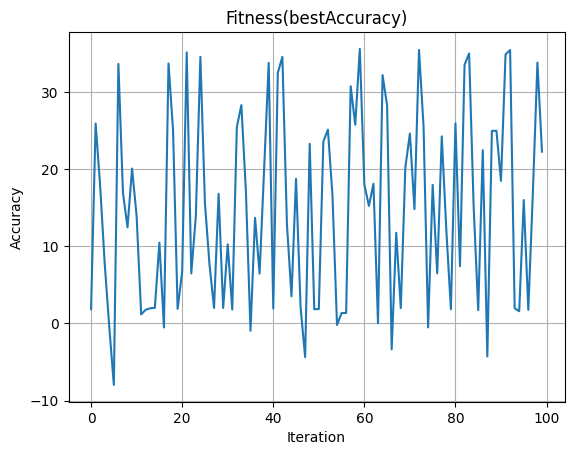

In [83]:
plt.plot(range(iterations), accuracies)
plt.title('Fitness(bestAccuracy)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid()
plt.show()